# Análisis de activos financieros en un intervalo de tiempo


In [1]:
# Llamado de librerias
%matplotlib inline

# Datos
import numpy as np
import pandas as pd
import yfinance as yf 
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
# from pandas_datareader import data as pdr
from operator import index

# Gráficas
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import (WeekdayLocator, MONDAY)
from IPython.display import display
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.dates as mpl_dates


plt.style.use('dark_background')

In [2]:
# Inputs
Asset = 'TSLA'
S_date = '2021-07-01'                                                                           #Formato yy/mm/dd
E_date = '2021-11-30'                                                                           #Formato yy/mm/dd

In [3]:
# Obtención de los datos de los activos en la lista
Data = yf.download(tickers = Asset, start = S_date, end = E_date, group_by = 'ticker')
Data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,227.973328,229.330002,224.266663,225.973328,225.973328,55903500
2021-07-02,226.326660,233.333328,224.419998,226.300003,226.300003,81163500
2021-07-06,227.236664,228.000000,217.133331,219.860001,219.860001,69853500
2021-07-07,221.423340,221.899994,212.773331,214.883331,214.883331,56376000
2021-07-08,209.456665,218.143326,206.820007,217.603333,217.603333,68319900


In [4]:
# Funciones de soportes y resistencias
def Support(Data, i):
    support = Data['Low'][i] < Data['Low'][i - 1] and Data['Low'][i] < Data['Low'][i + 1] and Data['Low'][i + 1] < Data['Low'][i + 2] and Data['Low'][i - 1] < Data['Low'][i - 2]
    return support 

def Resistance(Data, i):
    resistance = Data['High'][i] > Data['High'][i - 1] and Data['High'][i] > Data['High'][i + 1] and Data['High'][i + 1] > Data['High'][i + 2] and Data['High'][i - 1] > Data['High'][i - 2]
    return resistance 

S = np.mean(Data['High'] - Data['Low'])
def Far_from_level(j):
    return np.sum([abs(j - X) < S for X in Levels]) == 0

Levels = []
Colors = []
N = Data.shape[0]

for i in range(2, (N - 2)):
    if Support(Data, i):
        j = Data['Low'][i]
        print('---> Support: {}' .format(j.round(2)))
        print('Far from level: ', Far_from_level(j))
        if Far_from_level(j):
            Levels.append((i, j))
            Colors.append('green')
    elif Resistance(Data, i):
        j = Data['High'][i]
        print('---> Resistance: {}' .format(j.round(2)))
        print('Far from level: ', Far_from_level(j))
        if Far_from_level(j):
            Levels.append((i, j))
            Colors.append('red')

---> Support: 206.82
Far from level:  True
---> Resistance: 231.09
Far from level:  True
---> Resistance: 221.62
Far from level:  False
---> Resistance: 243.3
Far from level:  True
---> Resistance: 238.99
Far from level:  False
---> Resistance: 247.33
Far from level:  False
---> Support: 241.4
Far from level:  False
---> Support: 236.28
Far from level:  False
---> Resistance: 266.33
Far from level:  True
---> Support: 285.17
Far from level:  True
---> Resistance: 414.5
Far from level:  True
---> Support: 326.2
Far from level:  True
---> Resistance: 400.65
Far from level:  True
---> Support: 354.0
Far from level:  True


## El código resumido a una función

In [5]:
def Analisys(Asset, S_date, E_date, MA1, MA2, MA3):                                 #Formato yy/mm/dd
    # Obtención de los datos de los activos en la lista
    Data = yf.download(tickers = Asset, start = S_date, end = E_date, group_by = 'ticker')
    
    # Funciones de soportes y resistencias
    def Support(Data, i):
        support = Data['Low'][i] < Data['Low'][i - 1] and Data['Low'][i] < Data['Low'][i + 1] and Data['Low'][i + 1] < Data['Low'][i + 2] and Data['Low'][i - 1] < Data['Low'][i - 2]
        return support 

    def Resistance(Data, i):
        resistance = Data['High'][i] > Data['High'][i - 1] and Data['High'][i] > Data['High'][i + 1] and Data['High'][i + 1] > Data['High'][i + 2] and Data['High'][i - 1] > Data['High'][i - 2]
        return resistance 

    S = np.mean(Data['High'] - Data['Low'])
    def Far_from_level(j):
        return np.sum([abs(j - X) < S for X in Levels]) == 0

    Levels = []
    Colors = []
    N = Data.shape[0]

    for i in range(2, (N - 2)):
        if Support(Data, i):
            j = Data['Low'][i]
            # print('---> Support: {}' .format(j.round(2)))
            # print('Far from level: ', Far_from_level(j))
            if Far_from_level(j):
                Levels.append((i, j))
                Colors.append('green')
        elif Resistance(Data, i):
            j = Data['High'][i]
            # print('---> Support: {}' .format(j.round(2)))
            # print('Far from level: ', Far_from_level(j))
            if Far_from_level(j):
                Levels.append((i, j))
                Colors.append('red')
    
    # Medias moviles simples (3)
    MA_1 = Data['Close'].rolling(MA1).mean()
    MA_2 = Data['Close'].rolling(MA2).mean()
    MA_3 = Data['Close'].rolling(MA3).mean()
    
    # Gráficas
    def Plot_all():
        X = Data['Close'].index
        Ax = Data.Close
        Ax.plot(legend = False, color = 'white', alpha = 1, linewidth = 2, figsize = (18, 7.5))
        for Level, Color in zip(Levels, Colors):
            plt.hlines(Level[1], xmin = X[Level[0]], \
            xmax = max(X), colors = Color, linestyles = 'dotted', linewidth = 2.5)
        # mplcyberpunk.add_glow_effects()
        plt.ylabel('USD Price')
        plt.title('{} Soportes y resistencias' .format(Asset))
        plt.xticks(rotation = 45, ha = 'right')
        plt.plot(MA_1, color = 'yellow', linewidth = 1)
        plt.plot(MA_2, color = 'orange', linewidth = 1)
        plt.plot(MA_3, color = 'blue', linewidth = 1) 
    Plot_all()

# Creación de los sliders
Analisys_controls = widgets.interactive(Analisys,
                                    Asset = widgets.Text(value = 'TSLA', placeholder = 'Type something', description = 'Asset name', disabled = False),
                                    S_date = widgets.DatePicker(description = 'Initial Date', disabled=False),
                                    E_date = widgets.DatePicker(description = 'End Date', disabled=False),
                                    MA1 = widgets.IntSlider(value = 10, min = 0, max = 200),
                                    MA2 = widgets.IntSlider(value = 20, min = 0, max = 200),
                                    MA3 = widgets.IntSlider(value = 50, min = 0, max = 200)
                                    
)

display(Analisys_controls)

interactive(children=(Text(value='TSLA', description='Asset name', placeholder='Type something'), DatePicker(v…

In [6]:
def Analisys(Asset, S_date, E_date, MA1, MA2, MA3):                                 #Formato yy/mm/dd
    # Obtención de los datos de los activos en la lista
    Data = yf.download(tickers = Asset, start = S_date, end = E_date, group_by = 'ticker')
    
    # Funciones de soportes y resistencias
    def Support(Data, i):
        support = Data['Low'][i] < Data['Low'][i - 1] and Data['Low'][i] < Data['Low'][i + 1] and Data['Low'][i + 1] < Data['Low'][i + 2] and Data['Low'][i - 1] < Data['Low'][i - 2]
        return support 

    def Resistance(Data, i):
        resistance = Data['High'][i] > Data['High'][i - 1] and Data['High'][i] > Data['High'][i + 1] and Data['High'][i + 1] > Data['High'][i + 2] and Data['High'][i - 1] > Data['High'][i - 2]
        return resistance 

    S = np.mean(Data['High'] - Data['Low'])
    def Far_from_level(j):
        return np.sum([abs(j - X) < S for X in Levels]) == 0

    Levels = []
    Colors = []
    N = Data.shape[0]

    for i in range(2, (N - 2)):
        if Support(Data, i):
            j = Data['Low'][i]
            # print('---> Support: {}' .format(j.round(2)))
            # print('Far from level: ', Far_from_level(j))
            if Far_from_level(j):
                Levels.append((i, j))
                Colors.append('green')
        elif Resistance(Data, i):
            j = Data['High'][i]
            # print('---> Support: {}' .format(j.round(2)))
            # print('Far from level: ', Far_from_level(j))
            if Far_from_level(j):
                Levels.append((i, j))
                Colors.append('red')
    
    # Medias moviles simples (SMA)
    MA_1 = Data['Close'].rolling(MA1).mean()
    MA_2 = Data['Close'].rolling(MA2).mean()
    MA_3 = Data['Close'].rolling(MA3).mean()
        
    Data = Data.reset_index()
    # Gráficas
    def Plot_all():
        ohlc = Data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc['Date'] = pd.to_datetime(ohlc['Date'])
        ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
        ohlc = ohlc.astype(float)
        
        # Creating Subplots
        # Creating Subplots
        fig, ax = plt.subplots(figsize = (18, 7.5))
        candlestick_ohlc(ax, ohlc.values, width = 0.6, colorup = 'green', colordown = 'red', alpha = 1)
        
        # Setting labels & titles
        ax.set_xlabel('Date (mm / dd / yy)')
        ax.set_ylabel('USD Price')
        fig.suptitle('{} Soportes, resistencias y medias móviles' .format(Asset))

        # X axis data
        X = ohlc['Date']
        
        # Setting the simple moving average (SMA)
        ax.plot(X, MA_1, color = 'yellow', label= 'SMA {}' .format(MA1) , alpha = 0.6)
        ax.plot(X, MA_2, color = 'orange', label= 'SMA {}' .format(MA2) , alpha = 0.6)
        ax.plot(X, MA_3, color = 'blue', label= 'SMA {}' .format(MA3) , alpha = 0.6)
        plt.legend()
        
        # Setting the supports and resistances
        for Level, Color in zip(Levels, Colors):
                    plt.hlines(Level[1], xmin = X[Level[0]], \
                    xmax = max(X), colors = Color, linestyles = 'dotted', linewidth = 2.5)

        # Formatting Date
        date_format = mpl_dates.DateFormatter('%m - %d - %Y')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        fig.tight_layout()
        plt.show()
    Plot_all()
    
        
# Creación de los sliders
Analisys_controls = widgets.interactive(Analisys,
                                    Asset = widgets.Text(value = 'TSLA', placeholder = 'Type something', description = 'Asset name', disabled = False),
                                    S_date = widgets.DatePicker(description = 'Initial Date', disabled=False),
                                    E_date = widgets.DatePicker(description = 'End Date', disabled=False),
                                    MA1 = widgets.IntSlider(value = 10, min = 0, max = 200),
                                    MA2 = widgets.IntSlider(value = 20, min = 0, max = 200),
                                    MA3 = widgets.IntSlider(value = 50, min = 0, max = 200)
                                    
)

display(Analisys_controls)

interactive(children=(Text(value='TSLA', description='Asset name', placeholder='Type something'), DatePicker(v…

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as wb
import numpy as np
import seaborn as sns

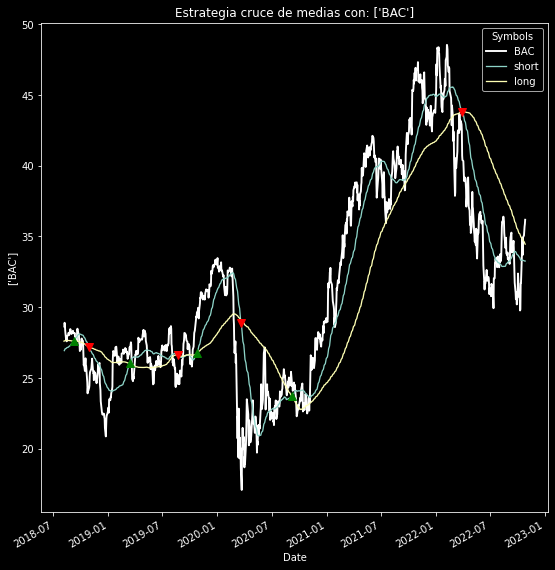

In [11]:
assets = ['BAC']
data = wb.DataReader(assets, 'yahoo', '2018-1-1')['Adj Close']

short_window = 50
long_window = 150

signal = pd.DataFrame(index=data.index)

signal['short']= data.rolling(short_window).mean()
signal['long']= data.rolling(long_window).mean()
signal['short'] = signal['short'].iloc[long_window:]

signal['signals'] = np.where(signal['short'] > signal['long'], 1, 0)

signal['positions'] = signal['signals'].diff()

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, ylabel=assets)
ax1.set_title("Estrategia cruce de medias con: " + str(assets))
data.iloc[long_window:].plot(ax=ax1, color='w', lw=1.9)
signal[['short', 'long']].plot(ax=ax1, lw=1.3)
ax1.plot(signal['short'][signal['positions'] == 1], '^', markersize=8, color='g')
ax1.plot(signal['short'][signal['positions'] == -1], 'v', markersize=8, color='r')